# CAN DATA TAKE AWAY MY FEAR OF FLYING?( Machine Learn description)

## Importing libraries

In [1]:
from IPython.core.display import publish_display_data
!pip install pycaret
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## EDA

### Importing, exploring and dropping values of the new dataframe:

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/PedroPavanii/plane_crash/main/Plane%20Crashes.csv')

In [3]:
df.columns


Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')

In [4]:
df = df.drop(['MSN', 'YOM', 'Time','Registration', 'Schedule', 'Flight no.', 'Crash location',
         'Other fatalities','Circumstances', 'Region', 'Flight phase', 'Total fatalities', 'PAX fatalities', 'Crew fatalities'], axis=1)

In [5]:
df.isnull().sum(axis=0)

Date                0
Aircraft            1
Operator            0
Flight type        57
Survivors        1297
Crash site        383
Country             1
Crew on board      24
Pax on board       54
Crash cause         0
dtype: int64

### Grouping the types of Flights:

In [6]:
df['Flight type'] = df['Flight type'].str.replace('Scheduled Revenue Flight', 'Airline Flight')
df['Flight type'] = df['Flight type'].str.replace('Survey / Patrol / Reconnaissance', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Bombing', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Fire fighting', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Survey / Patrol / Reconnaissance', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Aerial photography', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Delivery', 'Government')
df['Flight type'] = df['Flight type'].str.replace('Postal (mail)', 'Government')
df['Flight type'] = df['Flight type'].str.replace('Charter/Taxi (Non Scheduled Revenue Flight)', 'Private')
df['Flight type'] = df['Flight type'].str.replace('Executive/Corporate/Business', 'Private')
df['Flight type'] = df['Flight type'].replace('Postal (mail)', 'Government')
df['Flight type'] = df['Flight type'].replace('Charter/Taxi (Non Airline Flight)','Private')

<ipython-input-6-04c7f481efa5>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Flight type'] = df['Flight type'].str.replace('Postal (mail)', 'Government')
<ipython-input-6-04c7f481efa5>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Flight type'] = df['Flight type'].str.replace('Charter/Taxi (Non Scheduled Revenue Flight)', 'Private')


### Drop the null values:

In [7]:
df = df.dropna()

## Modeling

### Hyperparametrers:

In [8]:
from pycaret.classification import *

s = setup(df, target = 'Survivors', session_id = 42, normalize=True, fix_imbalance=True, remove_outliers = True)   



,Description,Value
0,Session id,42
1,Target,Survivors
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(27066, 10)"
5,Transformed data shape,"(28816, 42)"
6,Transformed train set shape,"(20696, 42)"
7,Transformed test set shape,"(8120, 42)"
8,Numeric features,2
9,Categorical features,7


### Comparision of models:

In [9]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6187,0.6335,0.6782,0.6612,0.6695,0.2191,0.2193,1.3670
lr,Logistic Regression,0.6146,0.6090,0.7215,0.6444,0.6807,0.1984,0.2006,2.2880
rf,Random Forest Classifier,0.6124,0.6381,0.6224,0.6728,0.6464,0.2189,0.2198,1.8320
et,Extra Trees Classifier,0.6124,0.6284,0.6593,0.6599,0.6595,0.2095,0.2096,1.3660
nb,Naive Bayes,0.6083,0.6528,0.9166,0.6042,0.7264,0.1270,0.1750,1.1400
ridge,Ridge Classifier,0.6053,0.0000,0.7533,0.6280,0.6849,0.1682,0.1733,0.9610
svm,SVM - Linear Kernel,0.6052,0.0000,0.7051,0.6389,0.6703,0.1812,0.1828,0.6640
lda,Linear Discriminant Analysis,0.6052,0.5984,0.7533,0.6279,0.6849,0.1680,0.1732,0.7260
gbc,Gradient Boosting Classifier,0.6003,0.6021,0.5887,0.6697,0.6264,0.2005,0.2026,1.0790
lightgbm,Light Gradient Boosting Machine,0.5924,0.5975,0.5661,0.6675,0.6122,0.1887,0.1917,1.0390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Chosing the best model:

In [22]:
best = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6153,0.6133,0.7463,0.6392,0.6886,0.1933,0.1973
1,0.6174,0.6093,0.7349,0.6437,0.6863,0.2016,0.2045
2,0.6026,0.5936,0.7090,0.6354,0.6702,0.1743,0.1759
3,0.6396,0.6394,0.7322,0.6672,0.6982,0.2533,0.2550
4,0.6227,0.6179,0.7340,0.6492,0.6890,0.2140,0.2166
5,0.6095,0.6088,0.7034,0.6438,0.6723,0.1916,0.1927
6,0.6262,0.6153,0.7238,0.6558,0.6881,0.2245,0.2262
7,0.6183,0.6114,0.7331,0.6452,0.6863,0.2038,0.2066
8,0.6040,0.5947,0.7146,0.6356,0.6728,0.1758,0.1777


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tunning the best model:

In [23]:
tuned_model = tune_model(best,n_iter=20, fold = 3,choose_better = True, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6199,0.6138,0.7570,0.6407,0.6940,0.2013,0.2062
1,0.6339,0.6334,0.7465,0.6573,0.6990,0.2366,0.2397
2,0.6209,0.6153,0.7467,0.6443,0.6917,0.2064,0.2102
Mean,0.6249,0.6208,0.7501,0.6474,0.6949,0.2148,0.2187
Std,0.0064,0.0089,0.0049,0.0071,0.0030,0.0156,0.0149


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


### Evaluate the model:

In [24]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### ROC Curve:

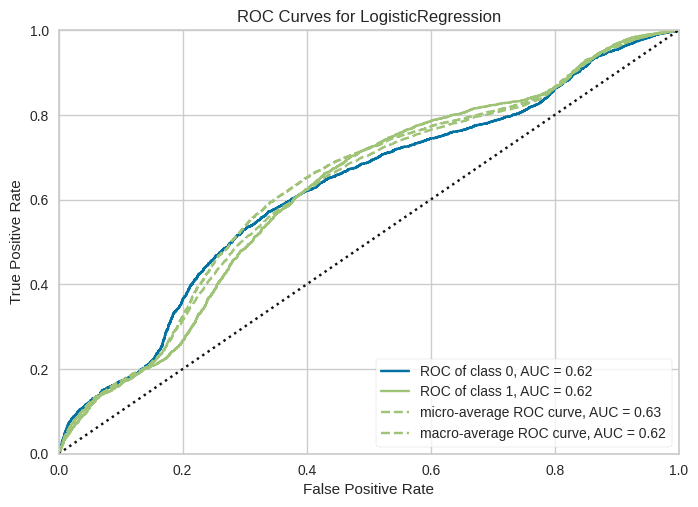

In [25]:
plot_model(best, plot = 'auc')

### Confusion Matrix:

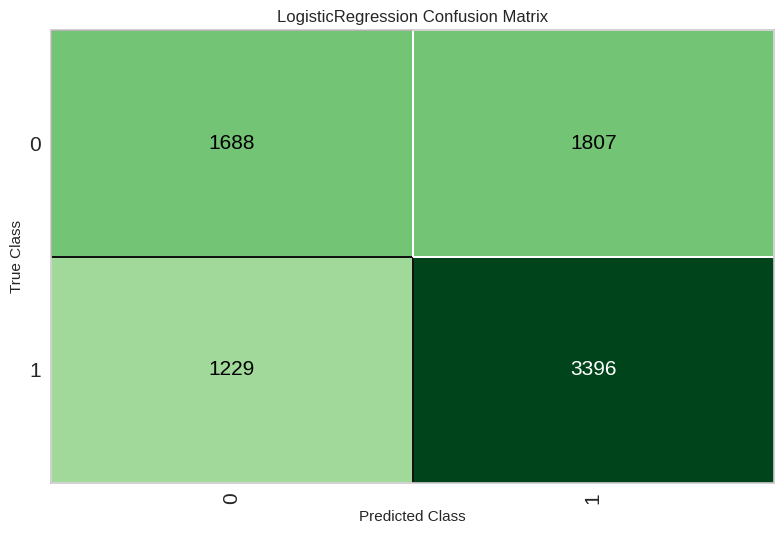

In [26]:
plot_model(best, plot = 'confusion_matrix')

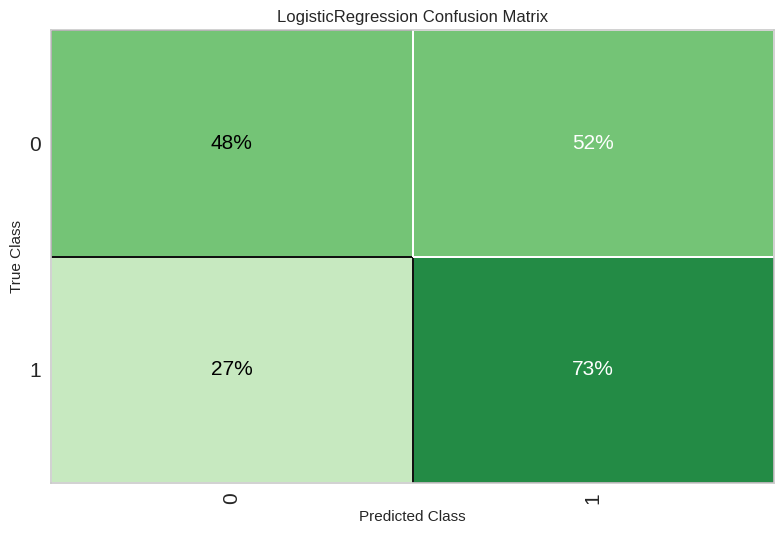

In [30]:
plot_model(best,plot = 'confusion_matrix', plot_kwargs= {'percent': True})

### Predict model:

In [27]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6261,0.6236,0.7343,0.6527,0.6911,0.2217,0.2242


,Date,Aircraft,Operator,Flight type,Crash site,Country,Crew on board,Pax on board,Crash cause,Survivors,prediction_label,prediction_score
8649,1948-11-05,Lockheed L-414 Hudson,Brazilian Air Force - Força Aérea Brasileira,Military,Airport (less than 10 km from airport),Brazil,0.0,0.0,Unknown,1,Yes,0.6156
7693,1946-05-07,Douglas C-47 Skytrain (DC-3),Royal Air Force - RAF,Military,Airport (less than 10 km from airport),United Kingdom,0.0,0.0,Human factor,1,Yes,0.9971
11934,1958-07-08,Noorduyn Norseman,Gibbes Sepik Airways,Cargo,Mountains,Papua New Guinea,1.0,0.0,Weather,0,Yes,0.9825
12739,1961-09-24,Douglas DC-3,United Nations Organization,Humanitarian,Airport (less than 10 km from airport),Democratic Republic of Congo,0.0,0.0,Unknown,1,Yes,0.9884
4398,1942-02-04,Vickers 416 Wellington IC,Royal Air Force - RAF,Training,Airport (less than 10 km from airport),United Kingdom,6.0,0.0,Unknown,1,Yes,0.9968
...,...,...,...,...,...,...,...,...,...,...,...,...
14984,1969-06-03,Antonov AN-12,Soviet Air Force - Voyenno-vozdushnye sily CCCP,Training,Airport (less than 10 km from airport),Russia,7.0,0.0,Human factor,0,No,0.9530
21527,1989-01-30,Learjet 23,Air Entreprise,Positioning,Airport (less than 10 km from airport),Portugal,2.0,0.0,Unknown,1,Yes,0.9811
1772,1931-06-14,De Havilland DH.80 Puss Moth,Harold Ashley Brock,Private,"Plain, Valley",France,1.0,1.0,Weather,0,No,0.5007
4890,1942-10-23,Airspeed AS.10 Oxford,Royal New Zealand Air Force - RNZAF,Training,Mountains,New Zealand,4.0,0.0,Human factor,0,No,0.9999


In [28]:
predictions = predict_model(best, data=df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8388,0.9113,0.8732,0.8483,0.8606,0.6697,0.6701


,Date,Aircraft,Operator,Flight type,Crash site,Country,Crew on board,Pax on board,Crash cause,Survivors,prediction_label,prediction_score
0,1918-05-02,De Havilland DH.4,United States Signal Corps - USSC,Test,Airport (less than 10 km from airport),United States of America,2.0,0.0,Technical failure,0,No,0.9941
1,1918-06-08,Handley Page V/1500,Handley Page Aircraft Company Ltd,Test,Airport (less than 10 km from airport),United Kingdom,6.0,0.0,Technical failure,1,Yes,0.9979
2,1918-06-11,Avro 504,Royal Air Force - RAF,Training,"Plain, Valley",Egypt,2.0,0.0,Unknown,1,Yes,0.9923
3,1918-06-19,De Havilland DH.4,United States Signal Corps - USSC,Military,Airport (less than 10 km from airport),United States of America,1.0,0.0,Technical failure,0,Yes,0.7649
5,1918-07-14,Fairey III,Marine Aeroplane Depot,Government,Airport (less than 10 km from airport),United Kingdom,1.0,0.0,Unknown,0,No,0.9957


In [29]:
predictions = predict_model(best, data=df, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8388,0.9113,0.8732,0.8483,0.8606,0.6697,0.6701


,Date,Aircraft,Operator,Flight type,Crash site,Country,Crew on board,Pax on board,Crash cause,Survivors,prediction_label,prediction_score_No,prediction_score_Yes
0,1918-05-02,De Havilland DH.4,United States Signal Corps - USSC,Test,Airport (less than 10 km from airport),United States of America,2.0,0.0,Technical failure,0,No,0.9941,0.0059
1,1918-06-08,Handley Page V/1500,Handley Page Aircraft Company Ltd,Test,Airport (less than 10 km from airport),United Kingdom,6.0,0.0,Technical failure,1,Yes,0.0021,0.9979
2,1918-06-11,Avro 504,Royal Air Force - RAF,Training,"Plain, Valley",Egypt,2.0,0.0,Unknown,1,Yes,0.0077,0.9923
3,1918-06-19,De Havilland DH.4,United States Signal Corps - USSC,Military,Airport (less than 10 km from airport),United States of America,1.0,0.0,Technical failure,0,Yes,0.2351,0.7649
5,1918-07-14,Fairey III,Marine Aeroplane Depot,Government,Airport (less than 10 km from airport),United Kingdom,1.0,0.0,Unknown,0,No,0.9957,0.0043


## Conclusion:

### The model chosen for the analysis was LinearRegression after being passed through competition using Pycaret. We obtained with the model an accuracy of 62%, an AUC curve of 62%, a precision of 65%. The most important parameter for the isolated analysis, taking into account the use of the worst case scenario a false positive, was the recall that we had 75%. By analyzing the Feature Importance graph, we were able to conclude a high incidence of the Data variable in the model's prediction, the peaks of accidents occurred in times of wars, with emphasis on the Second World War. The confusion matrix already allows us to conclude that the model presents an error rate of 27% for death and 52% for survival in the face of an accident. The correct answers were 48% for death and 73% for survival. The study needs more data to be able to state more precisely what the real probabilities of survival in a future accident are, the data found in the dataset are inclined to obtain influence from the increase in the number of fatalities due to wars. Finally, the model proves to be incapable of predicting probability, its use would indicate a mere percentage of low risk of effectiveness such as flipping a coin.